<class 'numpy.ndarray'>
uint8


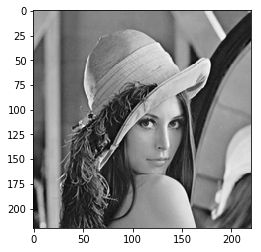

In [62]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

image_path = 'openCV-data/lena.png'

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
print(type(img))
print(img.dtype)

plt.imshow(img, cmap='gray')


Text(0.5,1,'Normalized')

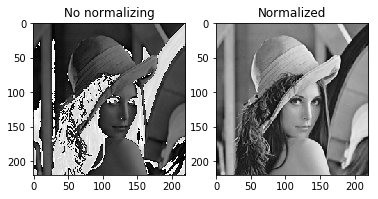

In [2]:
normalizedImg = img.copy()

img += 100000

normalizedImg = normalizedImg.astype(np.float64)
normalizedImg += 100000
cv2.normalize(normalizedImg,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
normalizedImg = normalizedImg.astype(np.uint8)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap='gray')
ax1.set_title('No normalizing')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(normalizedImg, cmap='gray')
ax2.set_title('Normalized')

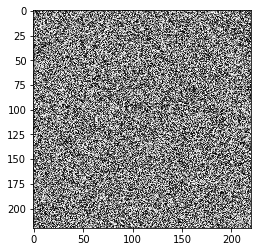

In [37]:
noise  = 2 * img.max() * np.random.random(img.shape)
plt.imshow(noise, 'gray')

In [12]:
noisy1 = img + 3 * img.std() * np.random.random(img.shape)

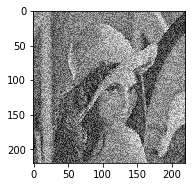

In [57]:
fig = plt.figure()
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(noisy1, cmap='gray')

In [7]:
noisy2 = img + noise 

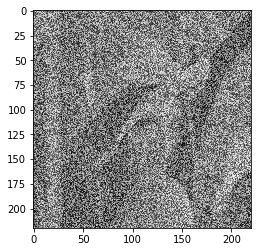

In [9]:
plt.imshow(noisy2, 'gray')

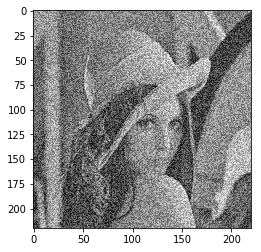

In [16]:
cv.blur(noisy1, (9,9))
plt.imshow(noisy1, 'gray')

In [14]:
gausBlur = cv2.GaussianBlur(noisy1,(5,5),0)

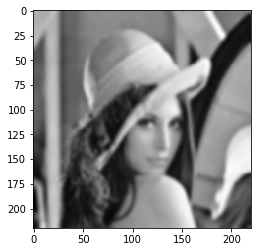

In [56]:
plt.imshow(gausBlur, 'gray')

In [23]:
median = cv2.medianBlur(img,9)

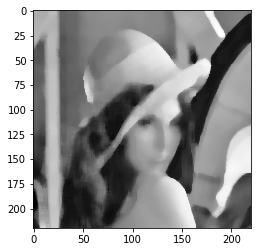

In [57]:
plt.imshow(median, 'gray')

In [27]:
gausBlur = cv2.GaussianBlur(img, (9,9), 0)

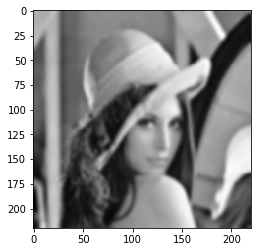

In [29]:
plt.imshow(gausBlur, 'gray')

In [30]:
freq = img - gausBlur

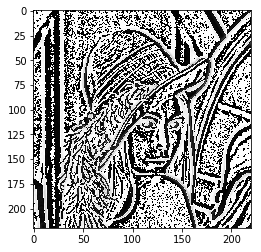

In [31]:
plt.imshow(freq, 'gray')

In [10]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    import random
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

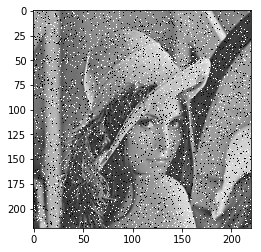

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline 

image_path = 'openCV-data/lena.png'

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
saltImage = sp_noise(img, 0.05)
plt.imshow(saltImage, 'gray')

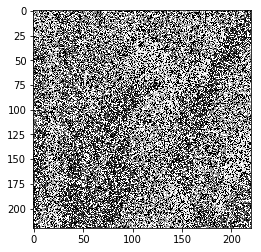

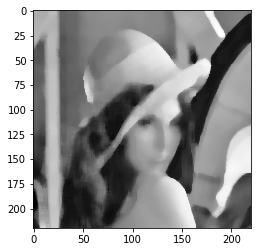

In [55]:
median = cv2.medianBlur(saltImage, 9)
plt.imshow(median, 'gray')

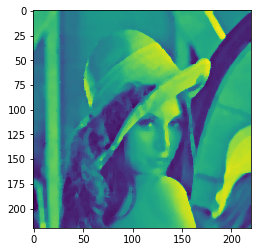

In [ ]:
normalizedImg = img.copy()

img += 100000

normalizedImg = normalizedImg.astype(np.float64)
normalizedImg += 100000
cv2.normalize(normalizedImg,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
normalizedImg = normalizedImg.astype(np.uint8)

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(img, cmap='gray')
ax1.set_title('No normalizing')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(normalizedImg, cmap='gray')
ax2.set_title('Normalized')

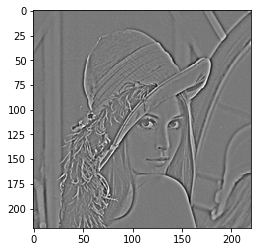

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

normalizedImg = img.copy()
normalizedImg = normalizedImg.astype(np.float64)
normalizedImg += 100000
cv2.normalize(normalizedImg,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
normalizedImg = normalizedImg.astype(np.uint8)

gausBlur = cv2.GaussianBlur(img, (9,9), 0)

normalizedBlured = gausBlur.copy()
gausBlur += 100000
normalizedBlured = normalizedBlured.astype(np.float64)
normalizedBlured+=100000
cv2.normalize(normalizedBlured, normalizedBlured, 0, 255, cv2.NORM_MINMAX)
normalizedBlured = normalizedBlured.astype(np.uint8)

contrast = img - gausBlur
normalizedContrast = contrast.copy()
normalizedContrast = normalizedContrast.astype(np.float64)
normalizedContrast+=100000
cv2.normalize(normalizedContrast, normalizedContrast, 0, 255, cv2.NORM_MINMAX)
normalizedContrast = normalizedContrast.astype(np.uint8)
plt.imshow(normalizedContrast, 'gray')

In [12]:
from __future__ import print_function
import numpy as np
import argparse
import cv2
 
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
 
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

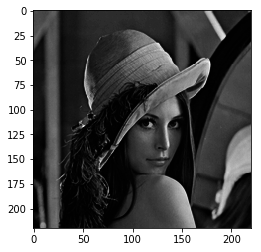

In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
corrected = adjust_gamma(img, 0.3)
plt.imshow(corrected, 'gray')

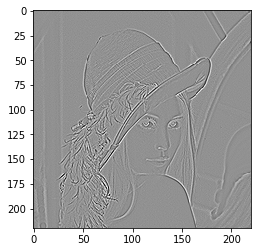

In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

image_path = 'openCV-data/lena.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#kernel = np.array([[0,-1,-1], [1,0,-1], [1,1,0]])
kernel = np.array([-1, 1])
filtered = cv2.filter2D(img, cv2.CV_8U, kernel)
gradiented = cv2.Laplacian(img, cv2.CV_64F, -1, 1)
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1)

plt.imshow(gradiented, 'gray')


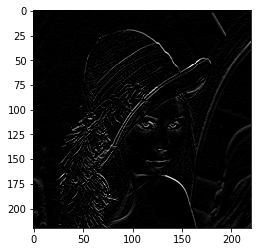

In [57]:
plt.imshow(filtered, 'gray')

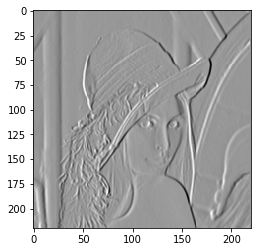

In [54]:
plt.imshow(sobelx, 'gray')

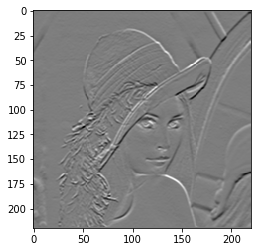

In [55]:
plt.imshow(sobely, 'gray')